In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

/Users/dhara/miniconda2/envs/snakes/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/dhara/miniconda2/envs/snakes/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [76]:
train_users.head(5)
#df = pd.concat((train_users, test_users), axis=0, ignore_index=True)
df = train_users
df.drop('id',axis=1, inplace=True)
df.head(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Gender

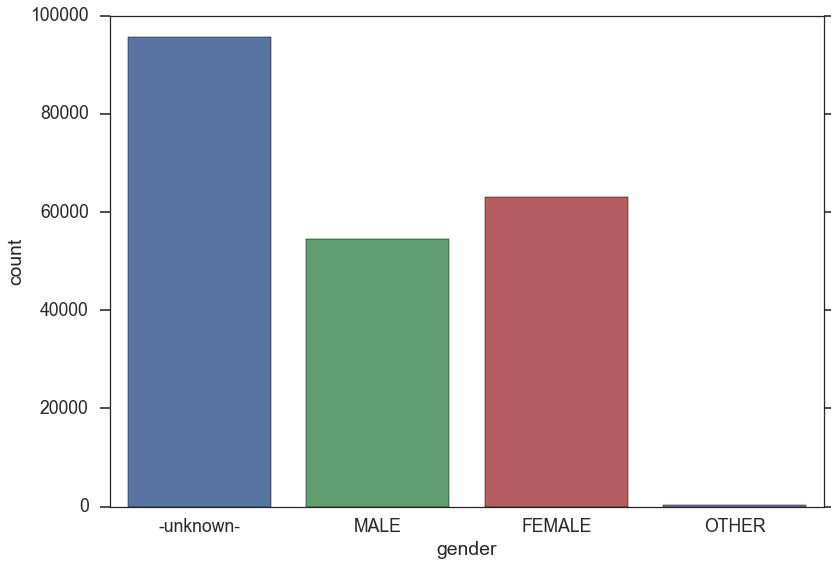

In [80]:
sns.countplot(x=df.gender, data=df);

As seen above, most mumber of users have unknown gender. Number of female users is slightly more than male users.

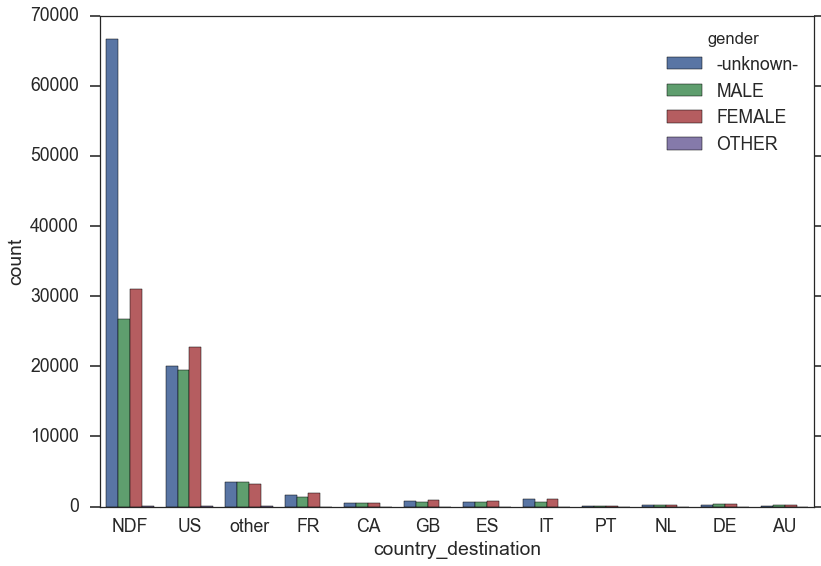

In [81]:
ax = sns.countplot(x="country_destination", hue="gender", data=df)


As seen from the plot above, most of the "unknown" gender users ended up not making a first booking.

Also, out of all the users who did not make a booking, most had "unknown" gender.

Let's look at the "NDF" category more closely:

In [85]:
from __future__ import division
len(df[df.gender == '-unknown-'])
print ("Percentage of unknown gender users:")
print (len(df[df.gender == '-unknown-'])/len(df)*100)
print ("Persentage of NDF users with unknown gender:")
print (len(df[(df.gender == '-unknown-') & (df.country_destination == 'NDF')])/len(df[df.country_destination == 'NDF'])*100)

Percentage of unknown gender users:
44.82902399145471
Persentage of NDF users with unknown gender:
53.531711938848424


Hence, More than 50% of users who did not make a booking have unknown gender

There is not much visual difference in male/female genders in the bookings made.

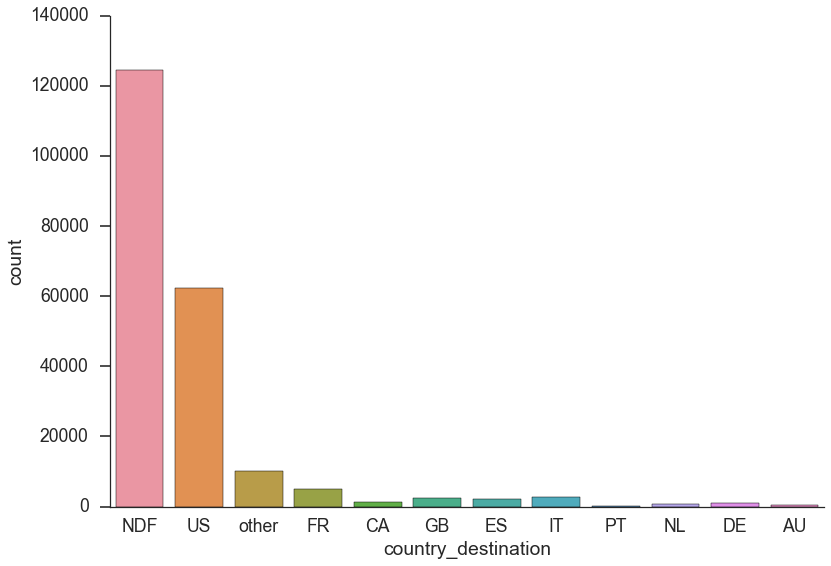

In [86]:
sns.countplot(x="country_destination", data=df);
sns.despine()

## Age

In [87]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 13, 'age'] = np.nan

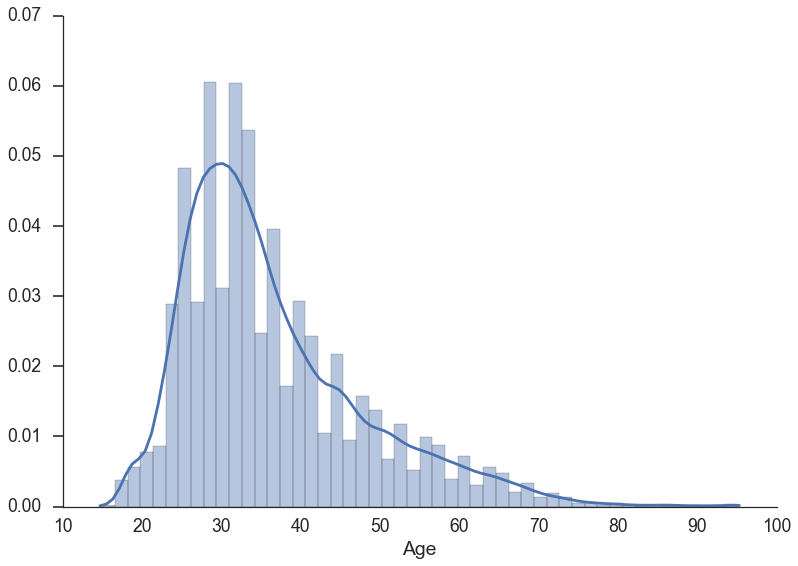

In [88]:
sns.distplot(df.age.dropna())
plt.xlabel('Age')
sns.despine()


In [89]:
df.age.dropna().describe()

count    122966.000000
mean         36.512670
std          11.571761
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

Since 75% of the bookings are under the age of 42, let's see how the older people people travel

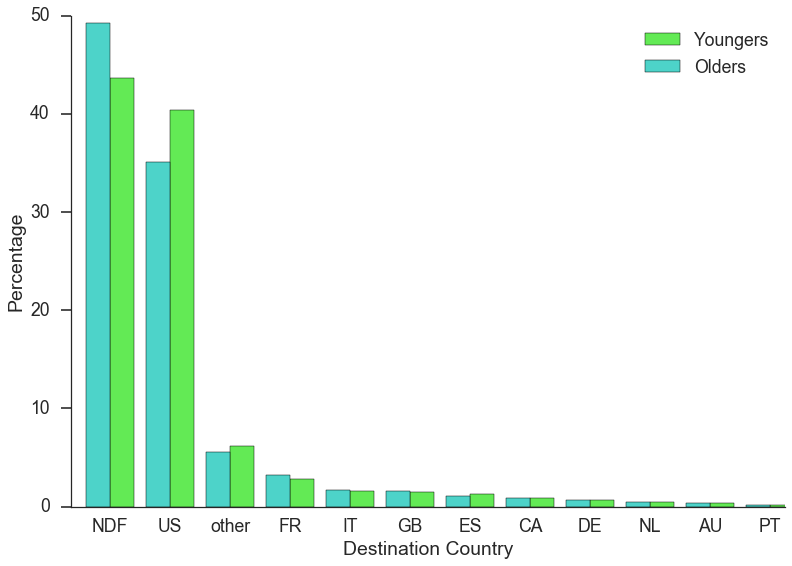

In [90]:
df_young = df[df.age<40]
df_old = df[df.age>=40]

younger_destinations = df_young['country_destination'].value_counts() / len(df_young) * 100
older_destinations = df_old['country_destination'].value_counts() / len(df_old) * 100
destinations = df['country_destination'].unique()

younger_destinations.plot(kind='bar',position=0,label='Youngers',rot=0,color='#63EA55',width=0.4)
older_destinations.plot(kind='bar',position=1,label='Olders',rot=0,color='#4DD3C9',width=0.4)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

As seen aqbove, The percentage of older people traveling to countries other than US is more than percentage of younger people traveling to countries other than US. 

Also, The percentage of older people not making a booking is more than the percentage of younger people making a booking.

## Dates



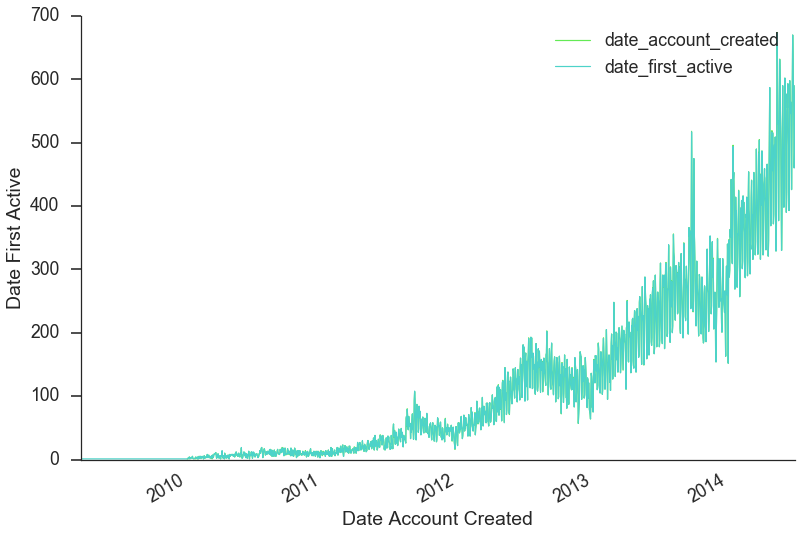

In [91]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
df['date_first_active'] = pd.to_datetime((df.timestamp_first_active // 1000000), format='%Y%m%d')
df.date_account_created.value_counts().plot(kind='line',linewidth=1.2, color='#63EA55')
df.date_first_active.value_counts().plot(kind='line',linewidth=1.2, color='#4DD3C9')
plt.legend()
plt.xlabel('Date Account Created')
plt.ylabel('Date First Active')

sns.despine()
plt.show()

As seen above, the date account created and date first active are highly correlated.

The number of users creating account is increasing overall. There are some peaks which we can see further:

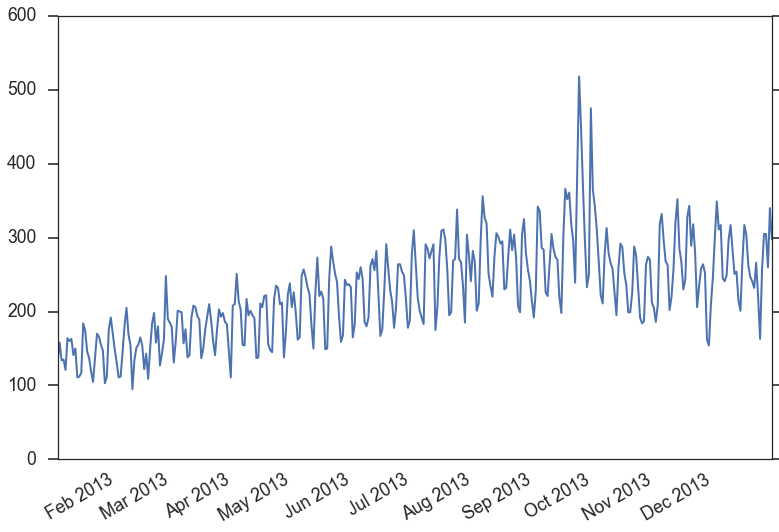

In [92]:
df_2013 = df[(df['date_account_created'] > pd.to_datetime(20130101, format='%Y%m%d')) & (df['date_account_created'] < pd.to_datetime(20140101, format='%Y%m%d'))]
df_2013.date_account_created.value_counts().plot(kind='line', linewidth=2)
plt.show()


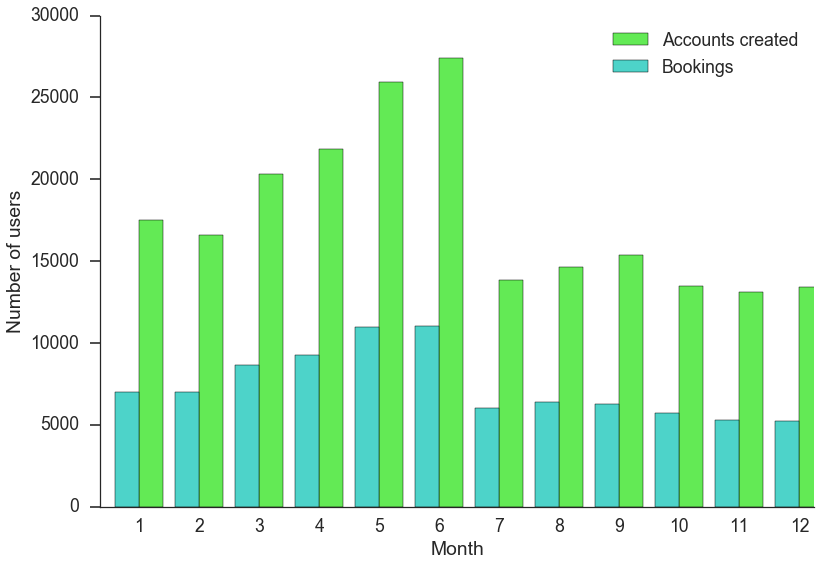

In [98]:
df.groupby(df.date_account_created.dt.month).size().plot(kind='bar',position=0,label='Accounts created',rot=0,color='#63EA55',width=0.4)

a = df.groupby([df.date_account_created.dt.month, df.country_destination]).size().unstack()
a.drop('NDF', axis=1).sum(axis=1).plot(kind='bar',position=1,label='Bookings',rot=0,color='#4DD3C9',width=0.4)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of users')

sns.despine()
plt.show()

As seen from the above bar plot, the month in which account is created is highly correlated with the nuber of bookins in the month. 

Number of account creations is high from March to June and then falls from July. 

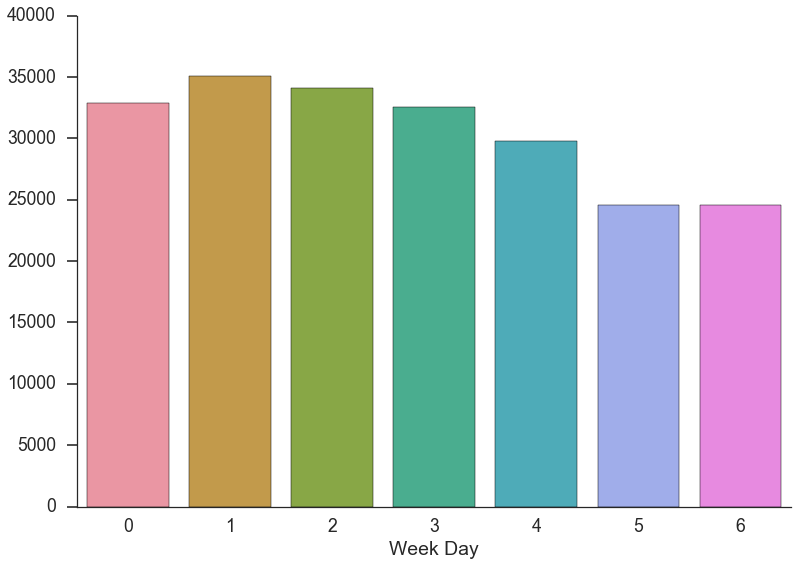

In [101]:
weekdays = []
for date in df.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

As seen from the above plot, accounts are created more on weekdays, with maximum on Tuesdays and minimum on weekends. 